In [1]:
import re
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Read the data from the text file
# with open("c:/Users/anany/Desktop/OSA/sleep_stage_paper_implementation/binary_clustering.txt", "r") as file:
#     data = file.read()

# Extract condition blocks
# conditions = re.split(r"binary \d+", data)

# Extract feature importance for each condition
condition_names = ["SEVERE", "MODERATE", "MILD"]
condition_data = [
    {
        "D1_percentile_75": 0.2270,
        "D5_percentile_25": 0.1959,
        "D2_hjorth_complexity": 0.1851,
        "D3_percentage_energy": 0.1801,
        "D2_percentile_75": 0.1777,
        "D5_percentage_energy": 0.1625,
        "slow_wave_index": 0.1522,
        "D2_percentile_25": 0.1513,
        "D4_ar_coeff_2": 0.1454,
        "D1_percentile_25": 0.1453,
        "D1_percentage_energy": 0.1436,
        "D2_energy": 0.1369,
        "D1_std": 0.1349,
        "D2_hjorth_activity": 0.1343,
        "D1_hjorth_activity": 0.1342,
        "D2_std": 0.1339,
        "A5_percentile_75": 0.1337,
        "D1_energy": 0.1334,
        "D2_ar_coeff_2": 0.1281,
        "D3_std": 0.1247
    },
    {
        "D5_percentile_25": 0.4348,
        "A5_percentile_25": 0.4250,
        "D5_percentile_75": 0.4194,
        "A5_percentile_75": 0.4042,
        "D4_percentile_75": 0.3615,
        "D4_percentile_25": 0.3544,
        "D5_percentage_energy": 0.3376,
        "D4_percentage_energy": 0.3196,
        "D3_energy": 0.3099,
        "D2_std": 0.3083,
        "D2_hjorth_activity": 0.3081,
        "D2_energy": 0.3066,
        "slow_wave_index": 0.3022,
        "D1_percentile_25": 0.3011,
        "D3_hjorth_activity": 0.3001,
        "D3_std": 0.3001,
        "D1_percentile_75": 0.2964,
        "D4_ar_coeff_2": 0.2877,
        "D4_hjorth_activity": 0.2864,
        "D5_energy": 0.2861
    },
    {
        "D2_energy": 0.4345,
        "D2_std": 0.4339,
        "D2_hjorth_activity": 0.4336,
        "D2_percentile_25": 0.3317,
        "D2_percentile_75": 0.3186,
        "D2_range": 0.3081,
        "D5_percentile_75": 0.2996,
        "D1_percentile_75": 0.2986,
        "D3_std": 0.2948,
        "D3_hjorth_activity": 0.2946,
        "D3_energy": 0.2933,
        "D1_percentile_25": 0.2923,
        "D1_energy": 0.2886,
        "D1_hjorth_activity": 0.2877,
        "D1_std": 0.2873,
        "D5_percentile_25": 0.2611,
        "D1_range": 0.2513,
        "D2_ar_coeff_2": 0.2287,
        "D4_percentile_25": 0.2260,
        "D2_hjorth_complexity": 0.2157
    }
]

# for condition in conditions:
#     matches = re.findall(r"(\w+): ([0-9.]+)", condition)
#     condition_data.append({feature: float(score) for feature, score in matches})

# Create a DataFrame where rows are conditions and columns are features
df = pd.DataFrame(condition_data, index=condition_names).fillna(0)

In [2]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Add PCA results to the DataFrame
df_pca = pd.DataFrame(pca_result, columns=["PC1", "PC2"], index=condition_names)

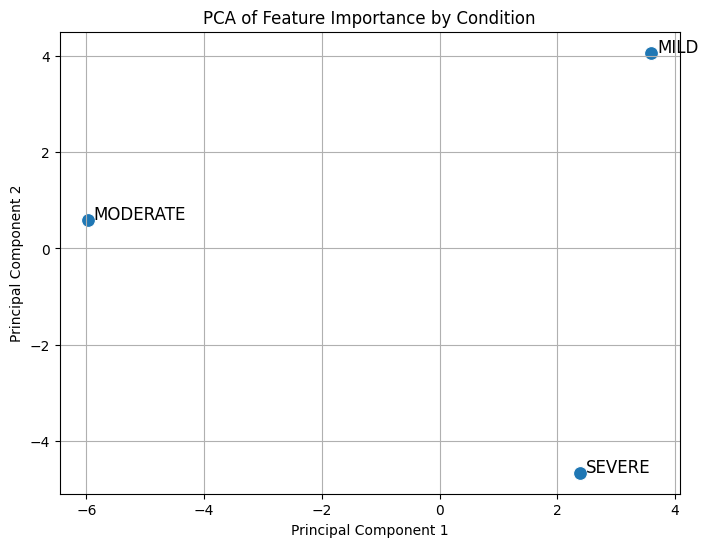

In [3]:
# Scatter plot of PCA results
plt.figure(figsize=(8, 6))
sns.scatterplot(x="PC1", y="PC2", data=df_pca, s=100)

# Annotate points with condition names
for i, condition in enumerate(df_pca.index):
    plt.text(df_pca.iloc[i, 0] + 0.1, df_pca.iloc[i, 1], condition, fontsize=12)

plt.title("PCA of Feature Importance by Condition")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()

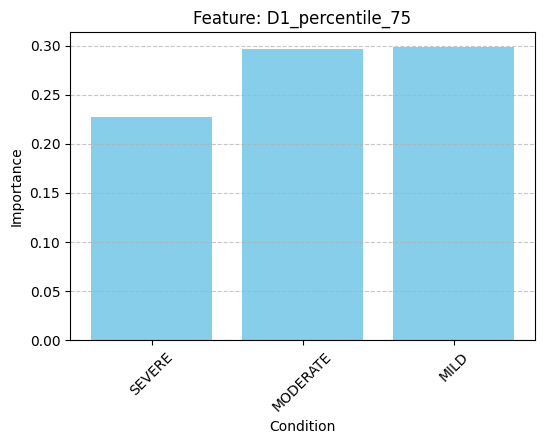

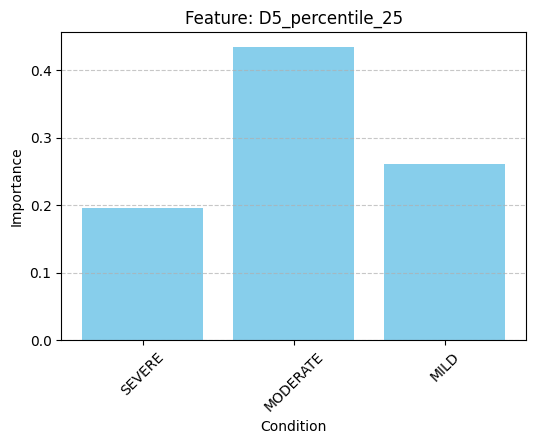

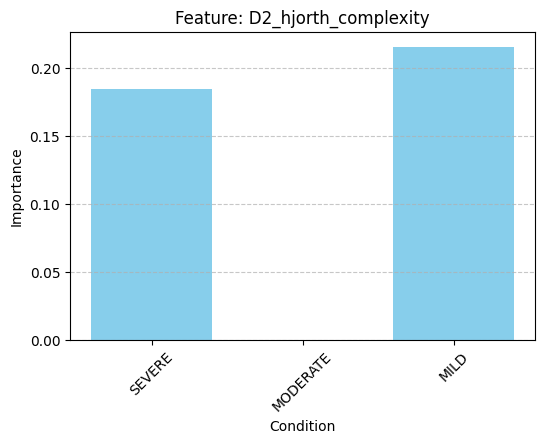

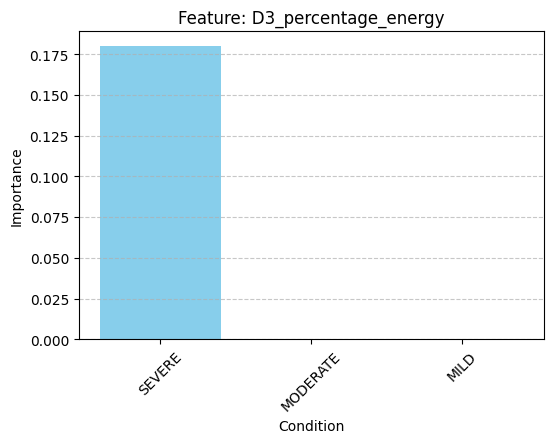

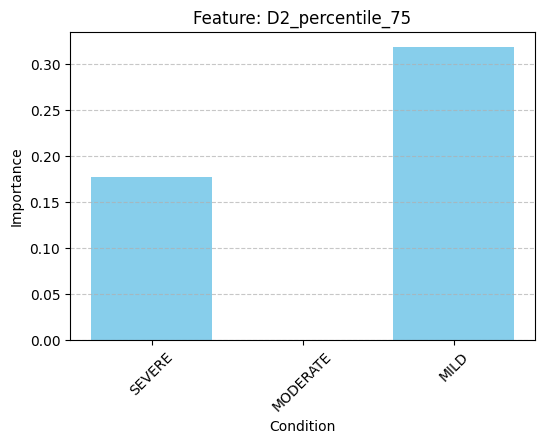

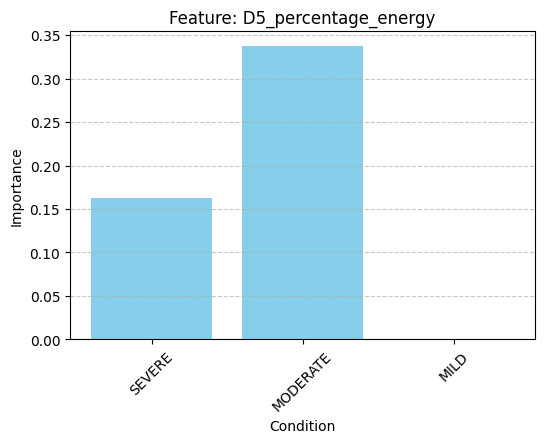

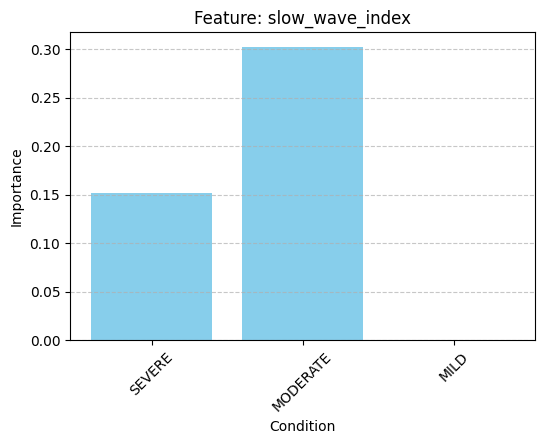

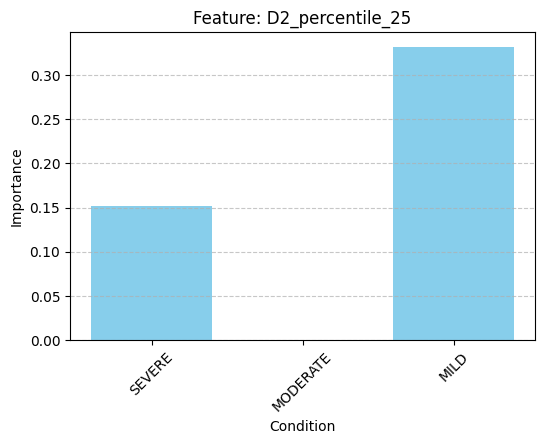

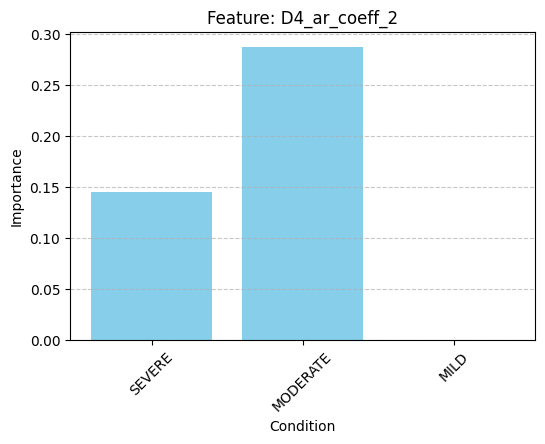

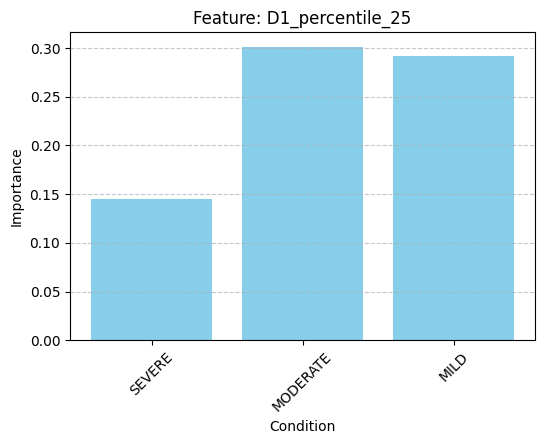

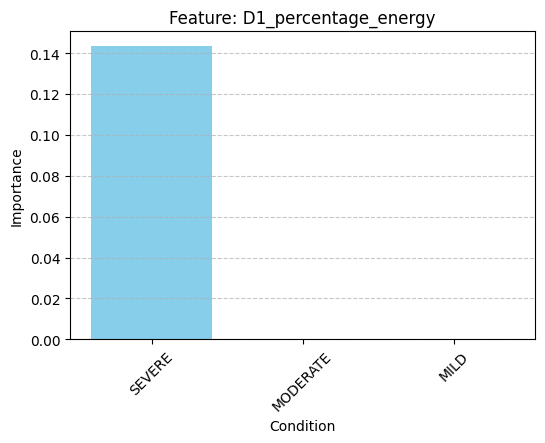

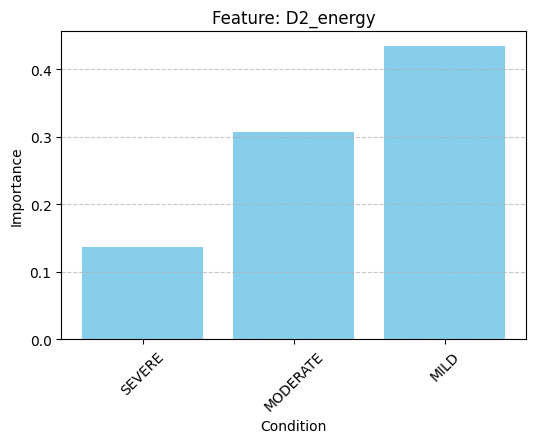

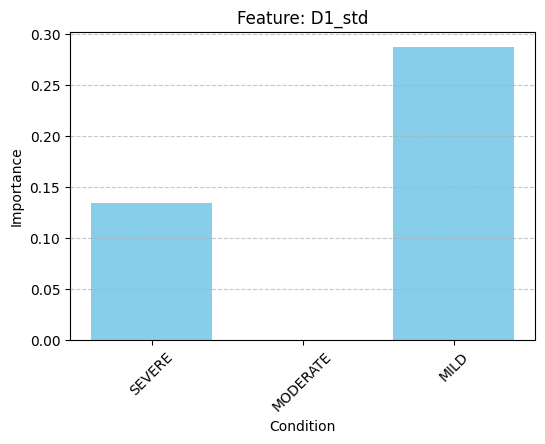

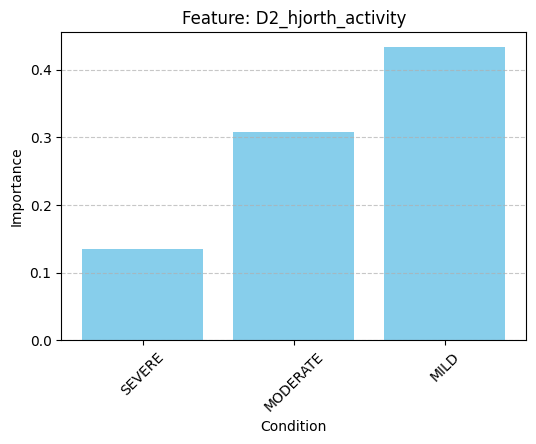

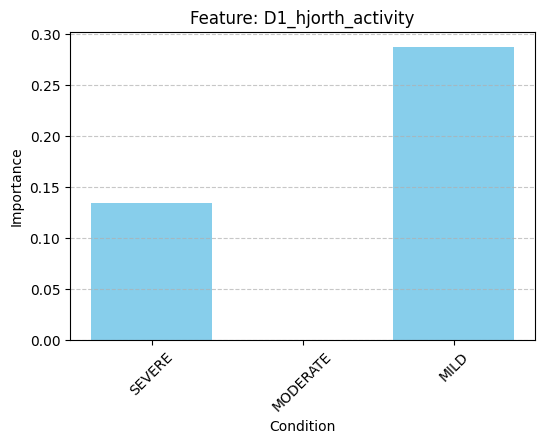

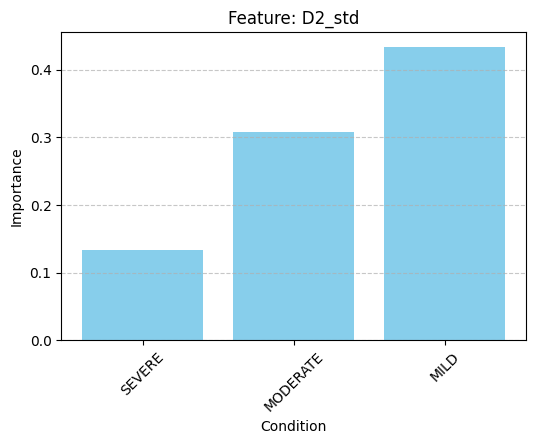

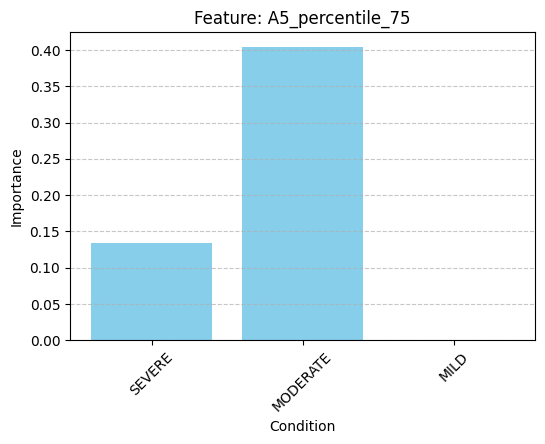

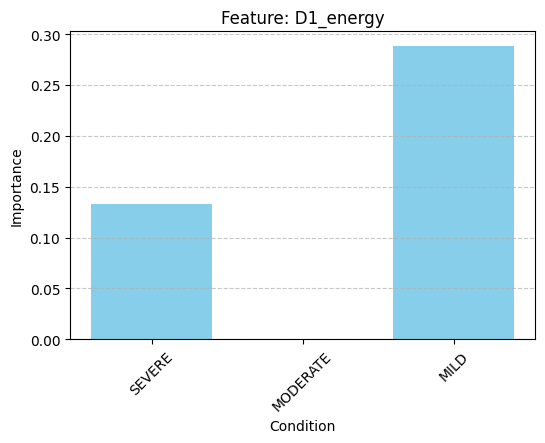

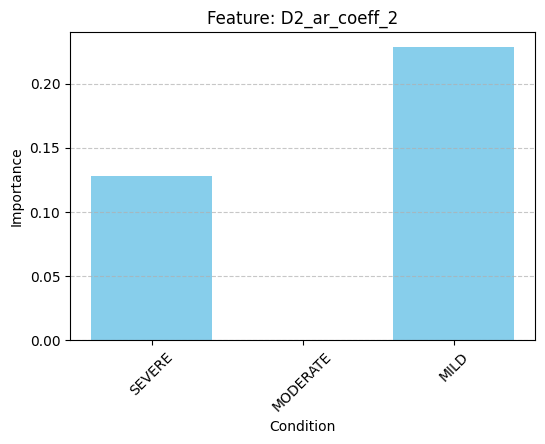

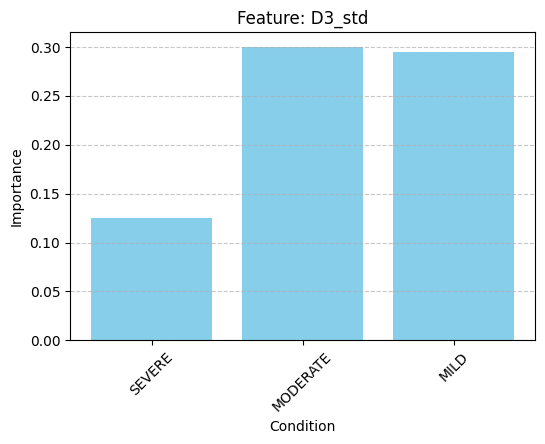

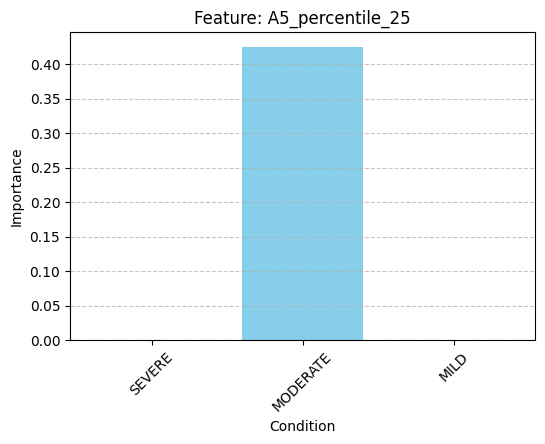

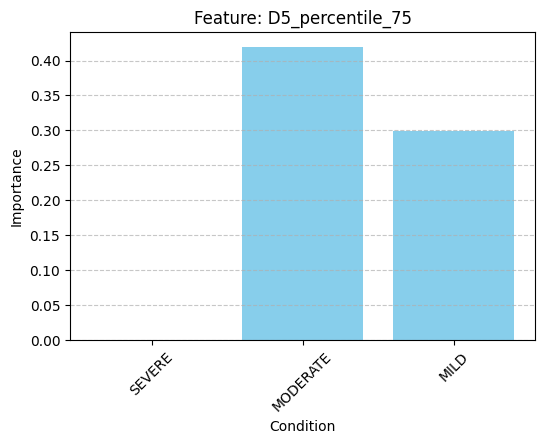

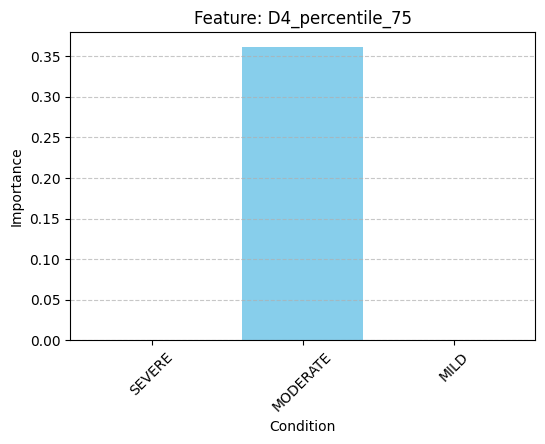

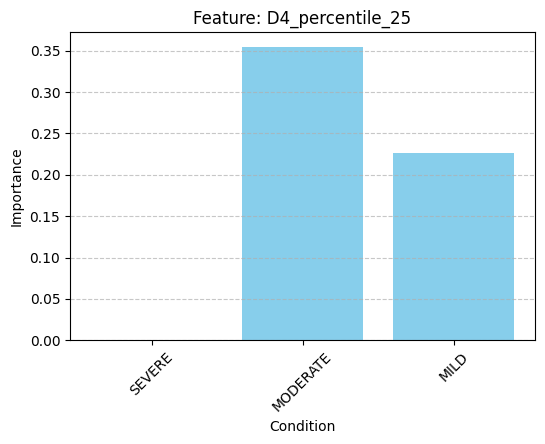

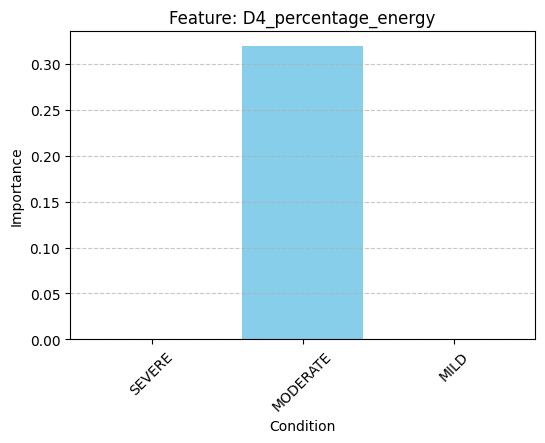

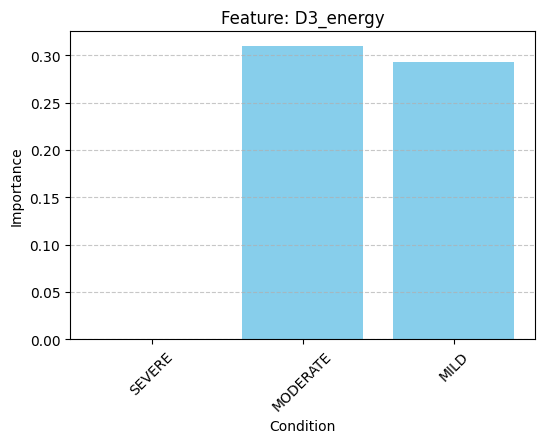

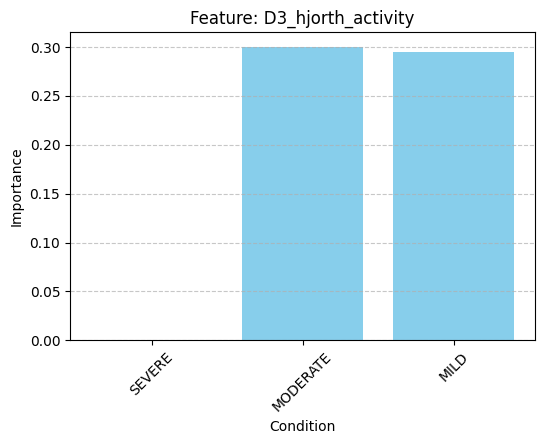

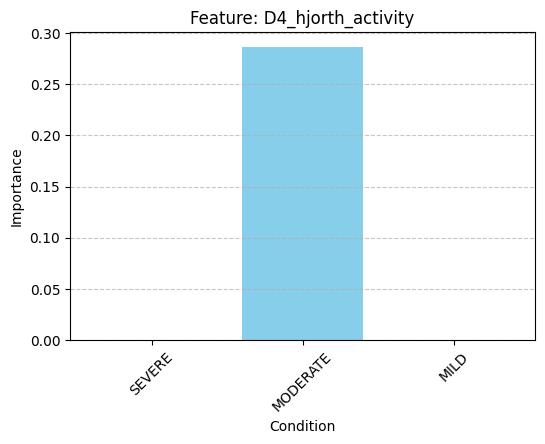

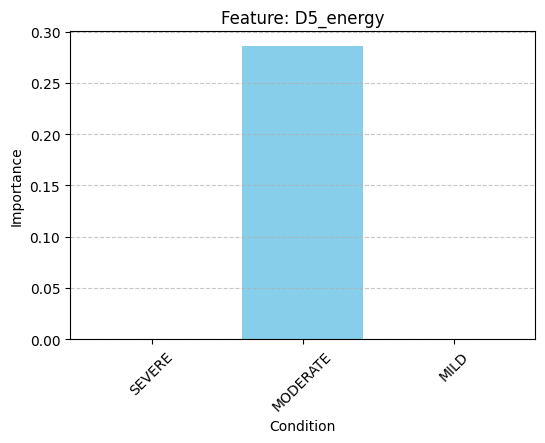

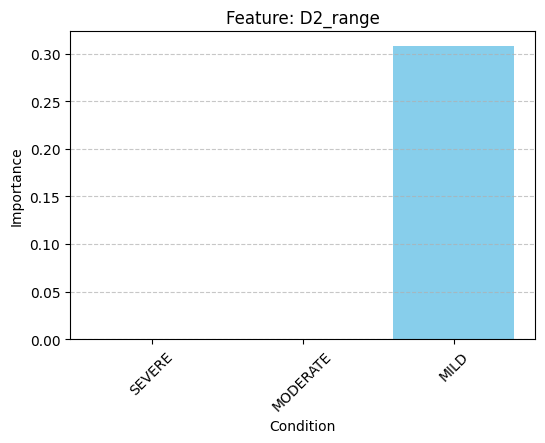

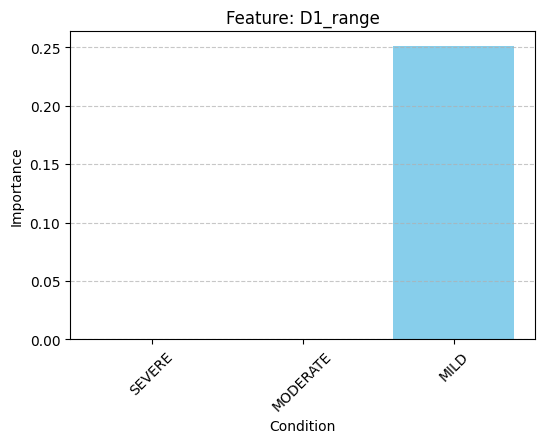

In [4]:
# Iterate through each feature in the DataFrame
for feature in df.columns:
    plt.figure(figsize=(6, 4))
    plt.bar(df.index, df[feature], color="skyblue")
    plt.title(f"Feature: {feature}")
    plt.xlabel("Condition")
    plt.ylabel("Importance")
    plt.xticks(rotation=45)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()